# Comparison plots for APOGEE and MWM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
from apogee_tools import import_apogee
from mwm_tools import import_mwm
import paths
import distribution_functions as dfs
from utils import get_color_list, get_bin_centers
import _globals

In [2]:
apogee_data = import_apogee()
apogee_data

,APOGEE_ID,RA,DEC,GALR,GALPHI,GALZ,SNREV,TEFF,TEFF_ERR,LOGG,LOGG_ERR,FE_H,FE_H_ERR,O_FE,O_FE_ERR,LATENT_AGE,LATENT_AGE_ERR,LOG_LATENT_AGE,LOG_LATENT_AGE_ERR
0,2M00000068+5710233,0.002850,57.173164,8.458404,175.658285,-0.040749,282.74594,5031.2637,10.145057,3.456132,0.023554,-0.160280,0.006890,0.113698,0.023433,3.713866,1.315107,0.569826,0.138561
1,2M00000133+5721163,0.005558,57.354549,11.953869,153.654715,-0.470835,120.29548,4974.6010,15.310856,2.388251,0.035517,-0.509530,0.011012,0.185943,0.039313,NaN,NaN,NaN,NaN
2,2M00000211+6327470,0.008802,63.463078,12.858291,151.396933,0.169356,169.02042,4681.4634,8.766338,2.245527,0.024334,-0.075011,0.008396,0.027783,0.016560,NaN,NaN,NaN,NaN
3,2M00000222+5625359,0.009287,56.426662,9.217623,168.311742,-0.185231,129.40749,5049.7686,14.194268,3.291666,0.029259,-0.139290,0.009310,0.087976,0.033478,1.241603,0.066435,0.093983,0.031293
4,2M00000446+5854329,0.018603,58.909149,10.505168,160.196856,-0.203834,144.98238,4766.6274,10.474075,2.420902,0.026512,-0.082189,0.009157,0.043742,0.020672,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192985,2M23595669+6131251,359.986225,61.523659,9.939371,163.650440,-0.015894,154.12479,5008.3950,13.106046,2.480740,0.030519,-0.408670,0.009130,-0.031660,0.032894,NaN,NaN,NaN,NaN
192986,2M23595676+7918072,359.986523,79.302002,9.415115,168.484293,0.676923,446.47790,4311.3926,6.555767,1.731429,0.026187,-0.504450,0.009010,0.287303,0.012854,NaN,NaN,NaN,NaN
192987,2M23595837+5700444,359.993224,57.012356,10.694221,159.021606,-0.358826,101.53675,4954.1700,15.750314,2.474665,0.034748,-0.333100,0.011422,0.130718,0.037808,NaN,NaN,NaN,NaN
192988,2M23595886+5726058,359.995265,57.434956,9.328103,167.511337,-0.163006,232.91826,4859.9087,9.050734,2.480687,0.024013,-0.236560,0.007337,0.088913,0.019459,NaN,NaN,NaN,NaN


In [3]:
mwm_data = import_mwm()
mwm_data

/mnt/c/Users/dubay.11/Repos/galactic-dtd/src/scripts/mwm_tools.py:49: DtypeWarning: Columns (45,138,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(sample_file_path)


,SDSS_ID,SDSS4_APOGEE_ID,GAIA_DR2_SOURCE_ID,GAIA_DR3_SOURCE_ID,TIC_V8_ID,HEALPIX,CARTON_0,LEAD,VERSION_ID,CATALOGID,...,RAW_V_H,RAW_v_h_ERR,O_FE,O_FE_ERR,FE_H_CORR,O_H_CORR,O_FE_CORR,GALR,GALPHI,GALZ
0,116010946,2M03455125+3159498,216648634427297920,216648634427297920,26393503,45904,NaN,gaia_dr3_source,31,63050396568859167,...,-0.77444,0.002761,0.165681,0.042832,-0.431700,-0.205241,0.224690,12.087988,173.578696,-1.286873
1,115031735,2M03521570+2245296,64097924425213440,64097924425760896,440704022,60242,NaN,gaia_dr3_source,31,63050396552988608,...,-0.68217,0.000180,0.061359,0.030318,-0.515250,-0.393113,0.120368,9.947272,177.879409,-0.787836
2,114941357,2M03521583+1251133,37082820650773632,37082820650773632,242883458,76626,NaN,gaia_dr3_source,31,63050396551977516,...,-0.55261,0.000382,-0.015609,0.031277,-0.121340,-0.076171,0.043400,8.721607,179.757534,-0.333179
3,115029776,2M03521583+2129049,63675918118074240,63675918118074240,440704542,62290,NaN,gaia_dr3_source,31,63050396552967384,...,-0.63475,0.001017,0.134281,0.034340,-0.322480,-0.127421,0.193290,9.832419,178.162043,-0.768381
4,76315157,2M03521608+0923173,3302476533731766400,3302476533731766400,345453479,81746,NaN,gaia_dr3_source,31,63050395130270017,...,-0.42060,0.000946,0.093151,0.033987,-0.297530,-0.143601,0.152160,9.291797,179.937830,-0.733905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386527,116012082,2M03484436+3206590,216827442507284864,216827442507284864,26529654,45905,NaN,gaia_dr3_source,31,63050396568870197,...,-0.75906,0.001375,0.085641,0.035345,-0.438520,-0.292101,0.144650,12.102105,173.705737,-1.250867
386528,54636799,2M03484443+5409069,444479091656883840,444479091656883840,86637304,18685,NaN,gaia_dr3_source,31,63050394790173013,...,-0.16905,0.000304,0.016659,0.031530,0.028263,0.105700,0.075668,9.831466,173.759186,0.018624
386529,115028161,2M03484463+2052406,63258236840589056,63258236840589056,440689754,63313,NaN,gaia_dr3_source,31,63050396552949649,...,-0.59001,0.000866,0.013251,0.033119,-0.012550,0.061479,0.072260,9.273240,178.663139,-0.536094
386530,114948039,2M03484484+1416348,39727833309894400,39727833309894400,59003384,73553,NaN,gaia_dr3_source,31,63050396552057306,...,-0.57891,0.000605,0.040747,0.032429,-0.249350,-0.147825,0.099756,9.009043,179.466832,-0.496640


## Galactic Overview Plot

In [4]:
plt.style.use(paths.styles / 'presentation.mplstyle')

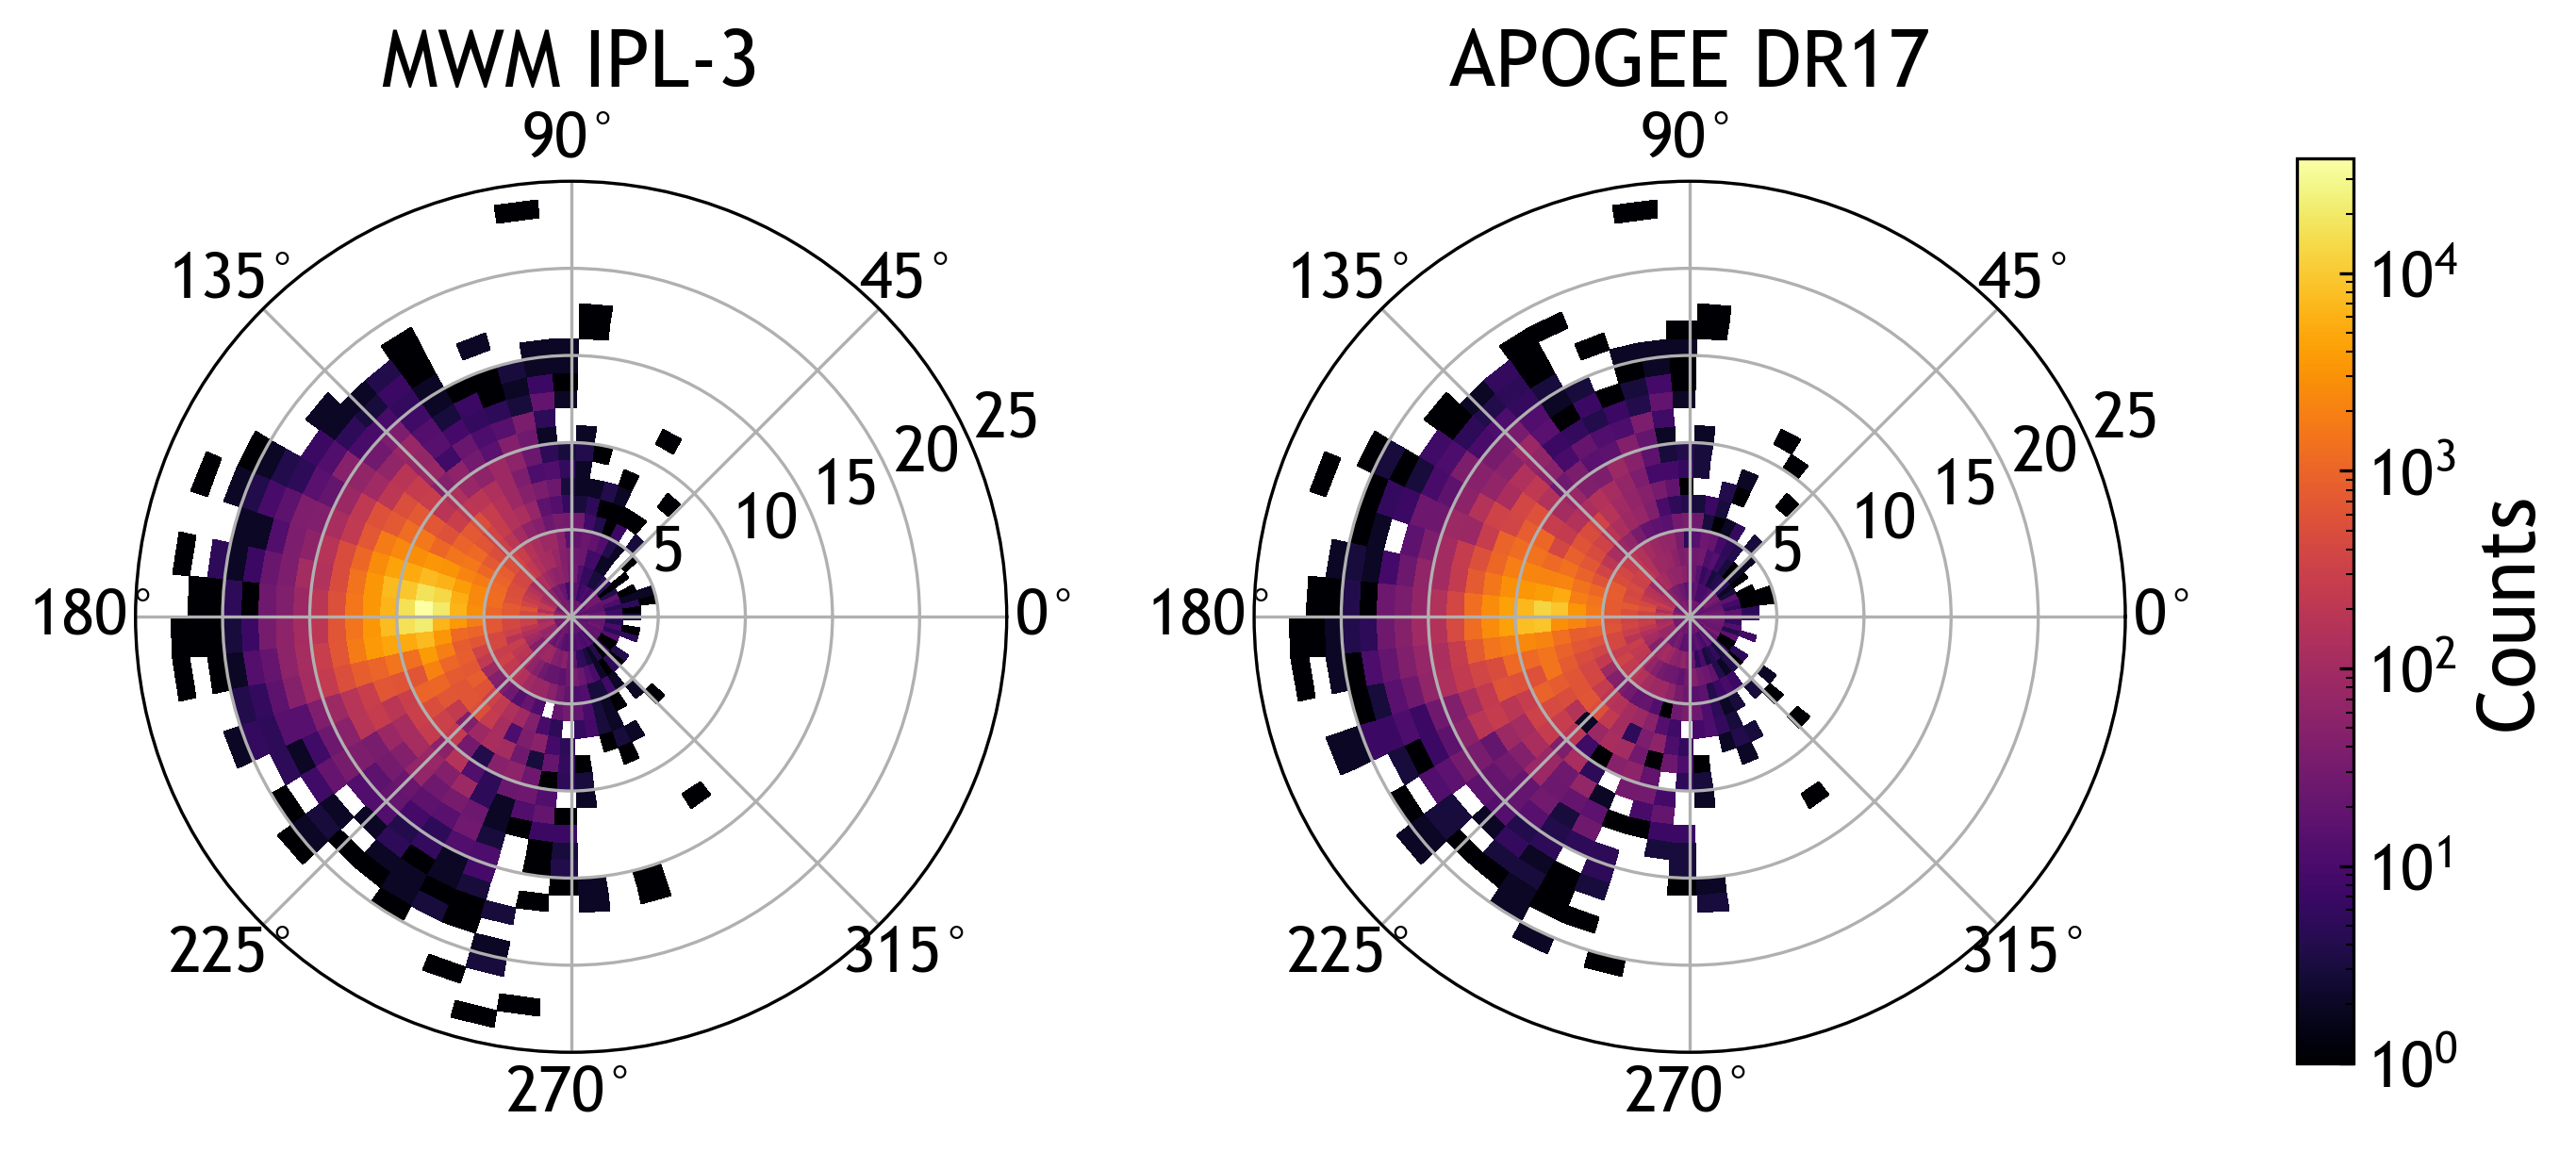

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), 
                        sharex=True, sharey=True, 
                        subplot_kw={'projection': 'polar'})
# MWM
abins = np.linspace(-np.pi, np.pi, 60)
rbins = np.arange(0, 26, 1)
mwm_hist, _, _ = np.histogram2d(mwm_data['GALPHI']*np.pi/180, mwm_data['GALR'], bins=(abins, rbins))
A, R = np.meshgrid(abins, rbins)
norm = LogNorm()
pc0 = axs[0].pcolormesh(A, R, mwm_hist.T, cmap='inferno', norm=norm)
axs[0].set_title('MWM IPL-3')
# fig.colorbar(pc0, ax=axs[0], label='Counts')
# APOGEE
apogee_hist, _, _ = np.histogram2d(apogee_data['GALPHI']*np.pi/180, apogee_data['GALR'], bins=(abins, rbins))
pc1 = axs[1].pcolormesh(A, R, apogee_hist.T, cmap='inferno', norm=norm)
axs[1].set_title('APOGEE DR17')
plt.subplots_adjust(right=0.85)
cax = plt.axes([0.9, 0.1, 0.02, 0.8])
fig.colorbar(pc1, cax, label='Counts')
plt.show()

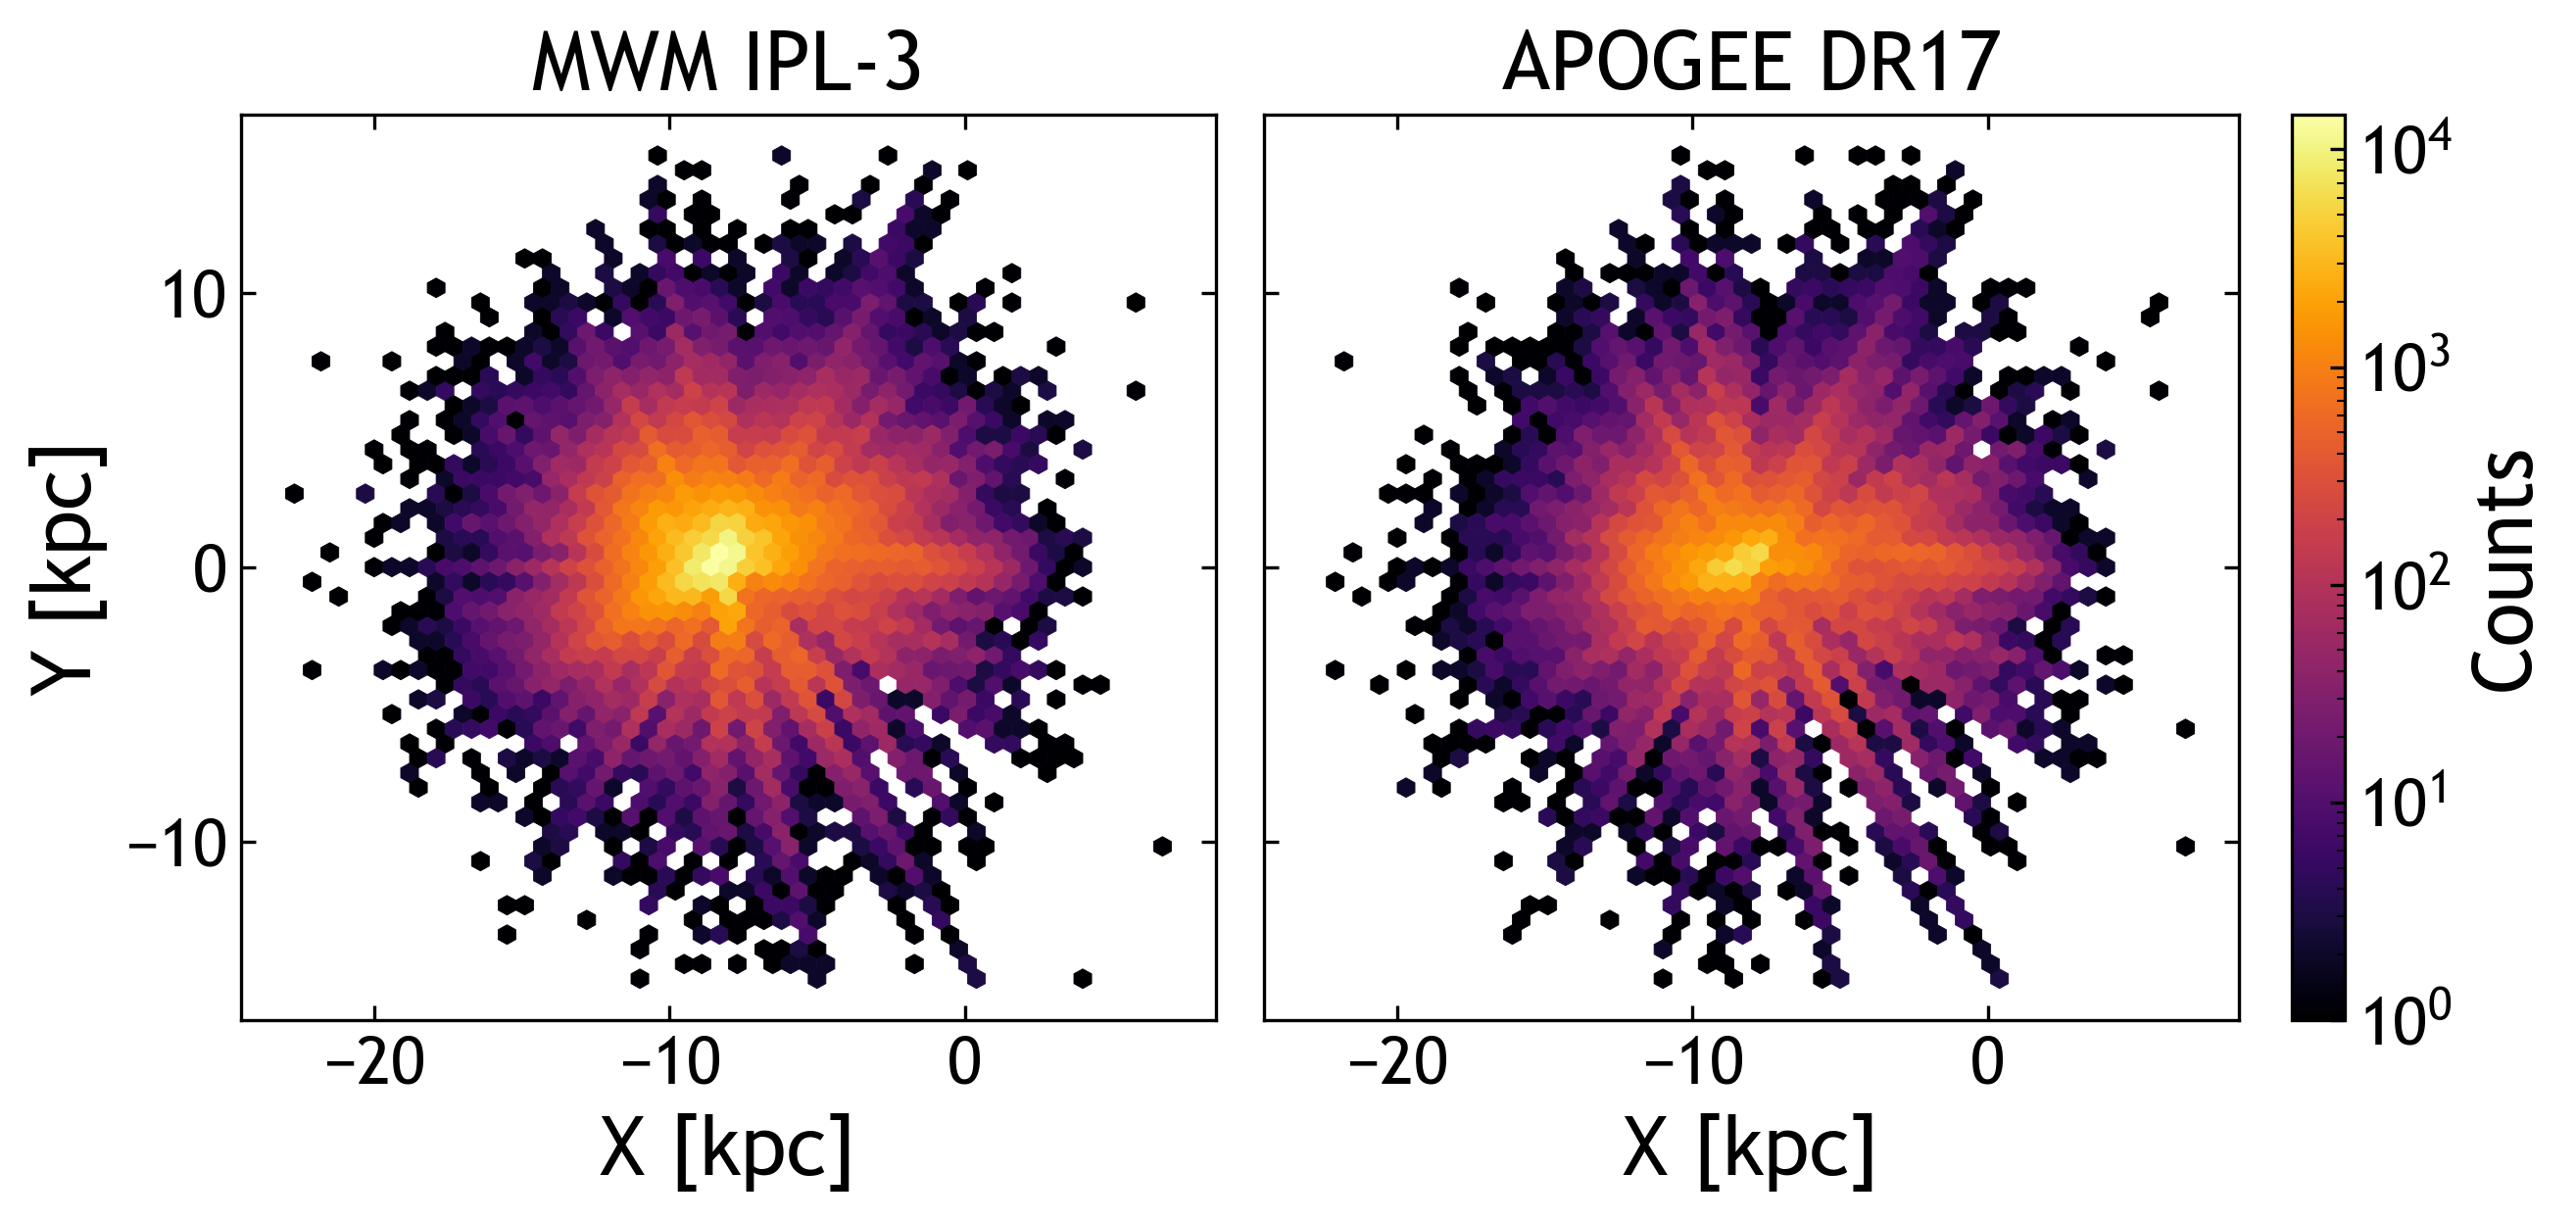

In [6]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

fig, axs = plt.subplots(1, 2, figsize=(9, 4), 
                        sharex=True, sharey=True)
xlim = (-23, 7)
ylim = (-15, 15)
extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
# MWM
# convert galactocentric coordinates to cartesian
x, y = pol2cart(mwm_data['GALR'], mwm_data['GALPHI']*np.pi/180)
norm = LogNorm()
hb0 = axs[0].hexbin(x, y, gridsize=50, cmap='inferno', norm=norm, extent=extent, linewidths=0.2)
axs[0].set_title('MWM IPL-3')
# APOGEE
x, y = pol2cart(apogee_data['GALR'], apogee_data['GALPHI']*np.pi/180)
hb1 = axs[1].hexbin(x, y, gridsize=50, cmap='inferno', norm=norm, extent=extent, linewidths=0.2)
axs[1].set_title('APOGEE DR17')
plt.subplots_adjust(right=0.88, wspace=0.05)
cax = plt.axes([0.9, 0.11, 0.02, 0.77])
fig.colorbar(hb1, cax, label='Counts')
axs[0].set_xlabel('X [kpc]')
axs[1].set_xlabel('X [kpc]')
axs[0].set_ylabel('Y [kpc]')
plt.show()

## Galactocentric radius vs midplane distance

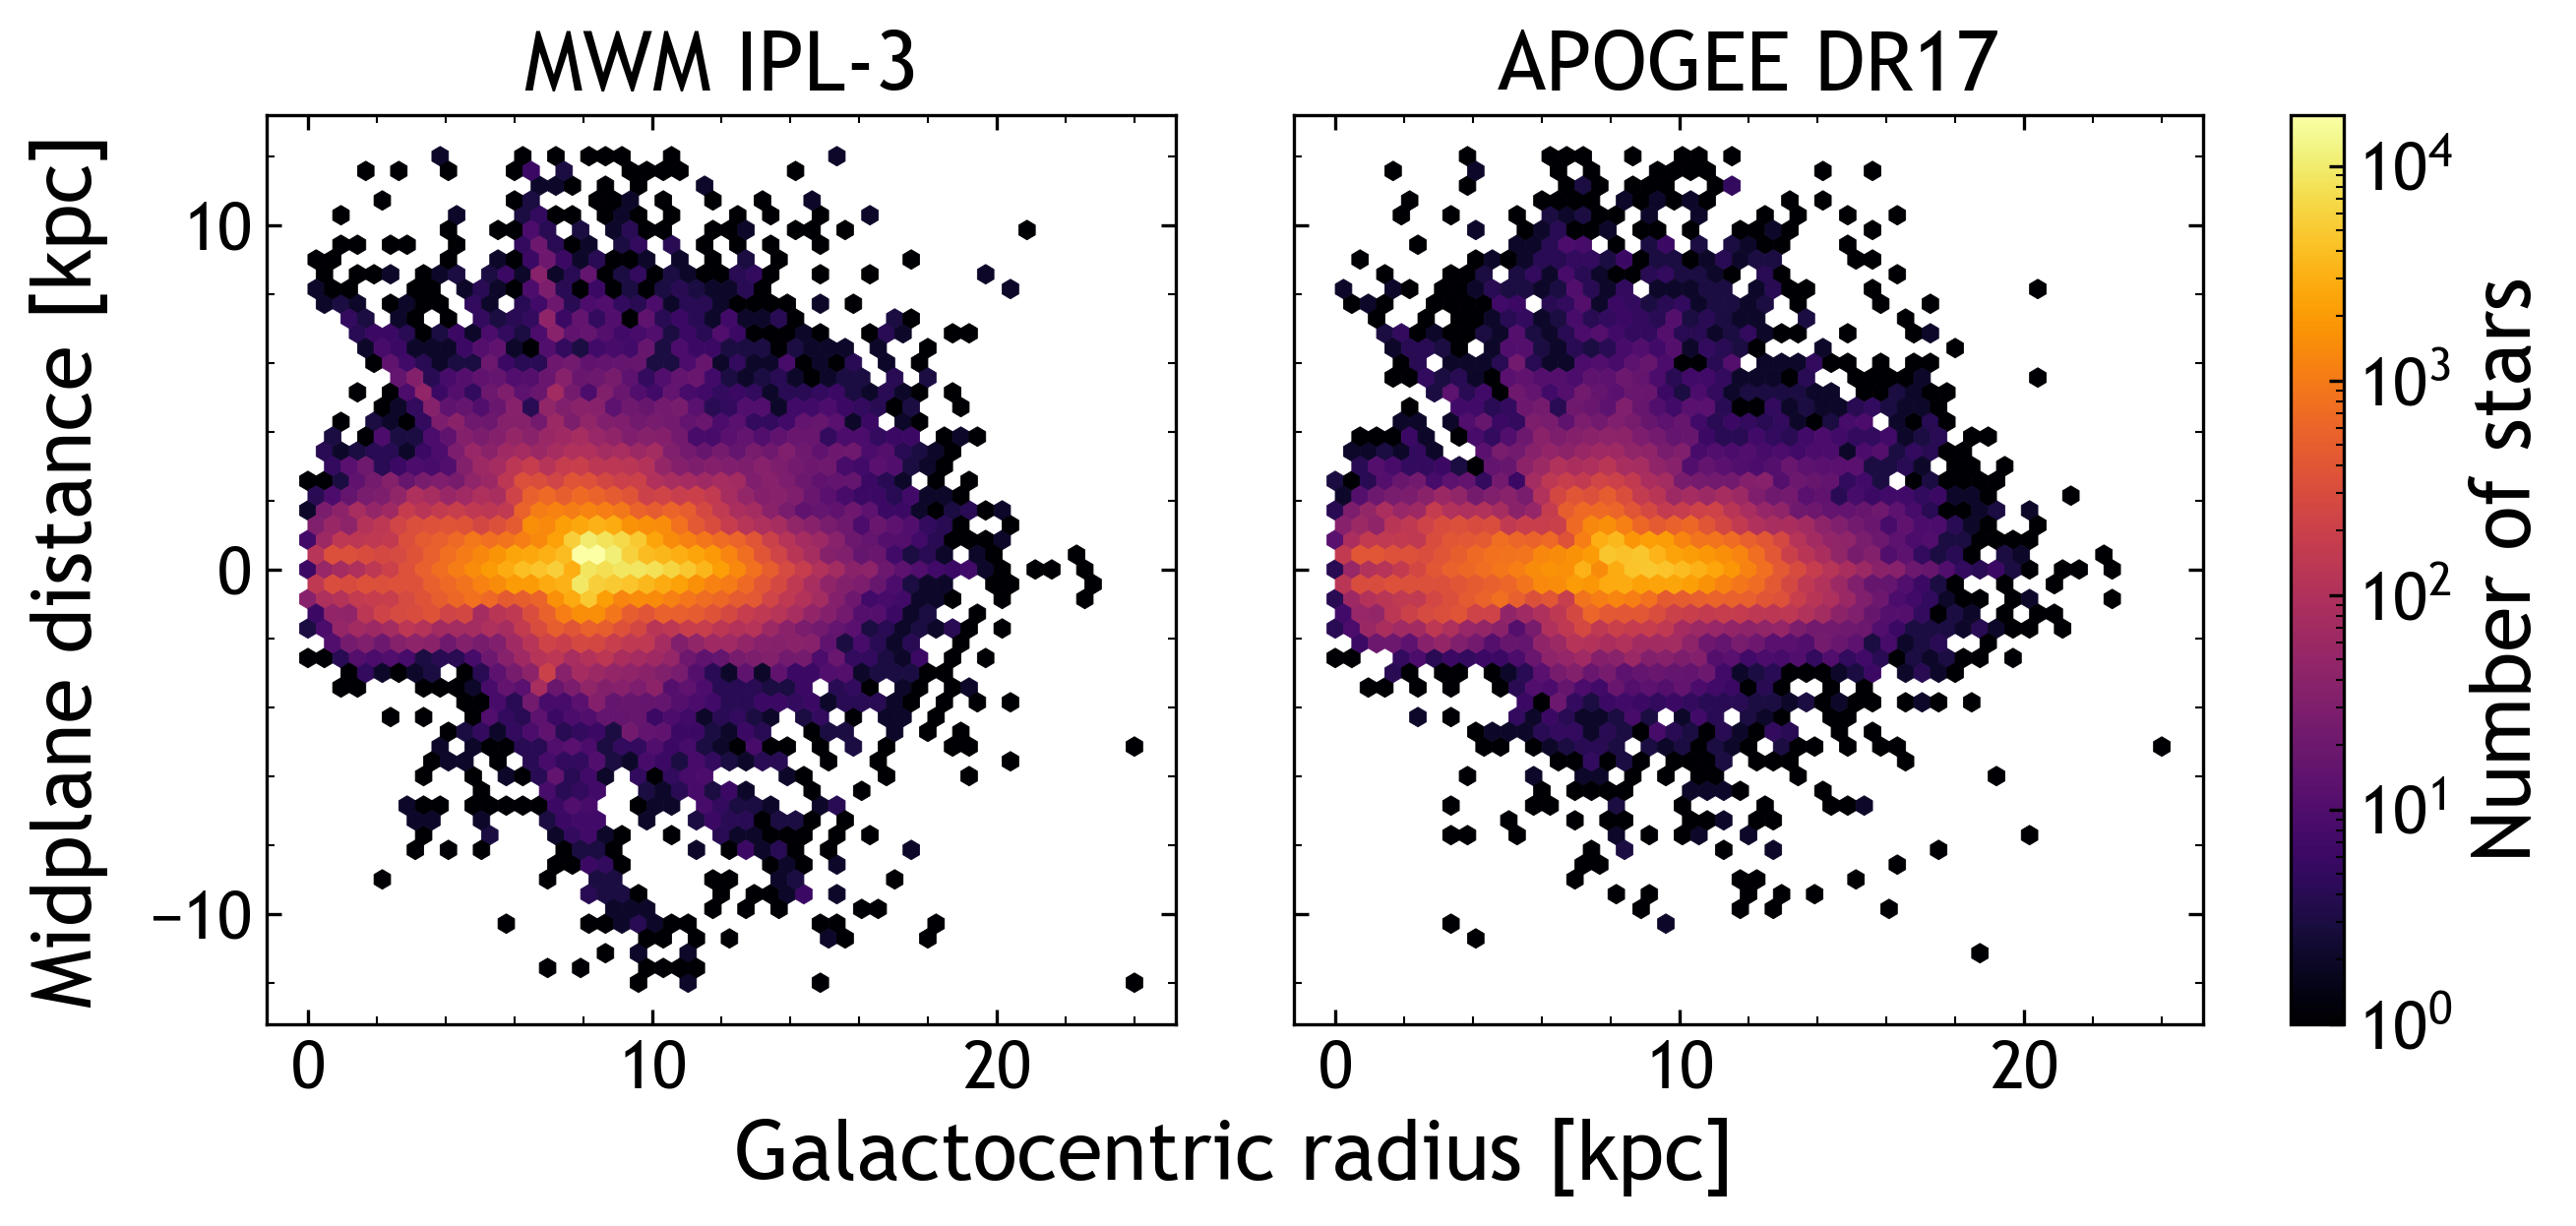

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4), 
                        sharex=True, sharey=True)
plt.style.use(paths.styles / 'presentation.mplstyle')
xlim = (0, 24)
ylim = (-12, 12)
extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
# MWM
norm = LogNorm()
hb0 = axs[0].hexbin(mwm_data['GALR'], mwm_data['GALZ'], 
                    gridsize=50, cmap='inferno', norm=norm, 
                    extent=extent, linewidths=0.2)
axs[0].set_title('MWM IPL-3')
axs[0].set_aspect('equal')
axs[0].xaxis.set_minor_locator(MultipleLocator(2))
axs[0].yaxis.set_major_locator(MultipleLocator(10))
axs[0].yaxis.set_minor_locator(MultipleLocator(2))
# APOGEE
hb1 = axs[1].hexbin(apogee_data['GALR'], apogee_data['GALZ'], 
                    gridsize=50, cmap='inferno', norm=norm, 
                    extent=extent, linewidths=0.2)
axs[1].set_aspect('equal')
axs[1].set_title('APOGEE DR17')
plt.subplots_adjust(right=0.88, wspace=0.05)
cax = plt.axes([0.9, 0.11, 0.02, 0.77])
fig.colorbar(hb1, cax, label='Number of stars')
# Common axis labels
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Galactocentric radius [kpc]')
plt.ylabel('Midplane distance [kpc]')
plt.show()

## Abundance Trends

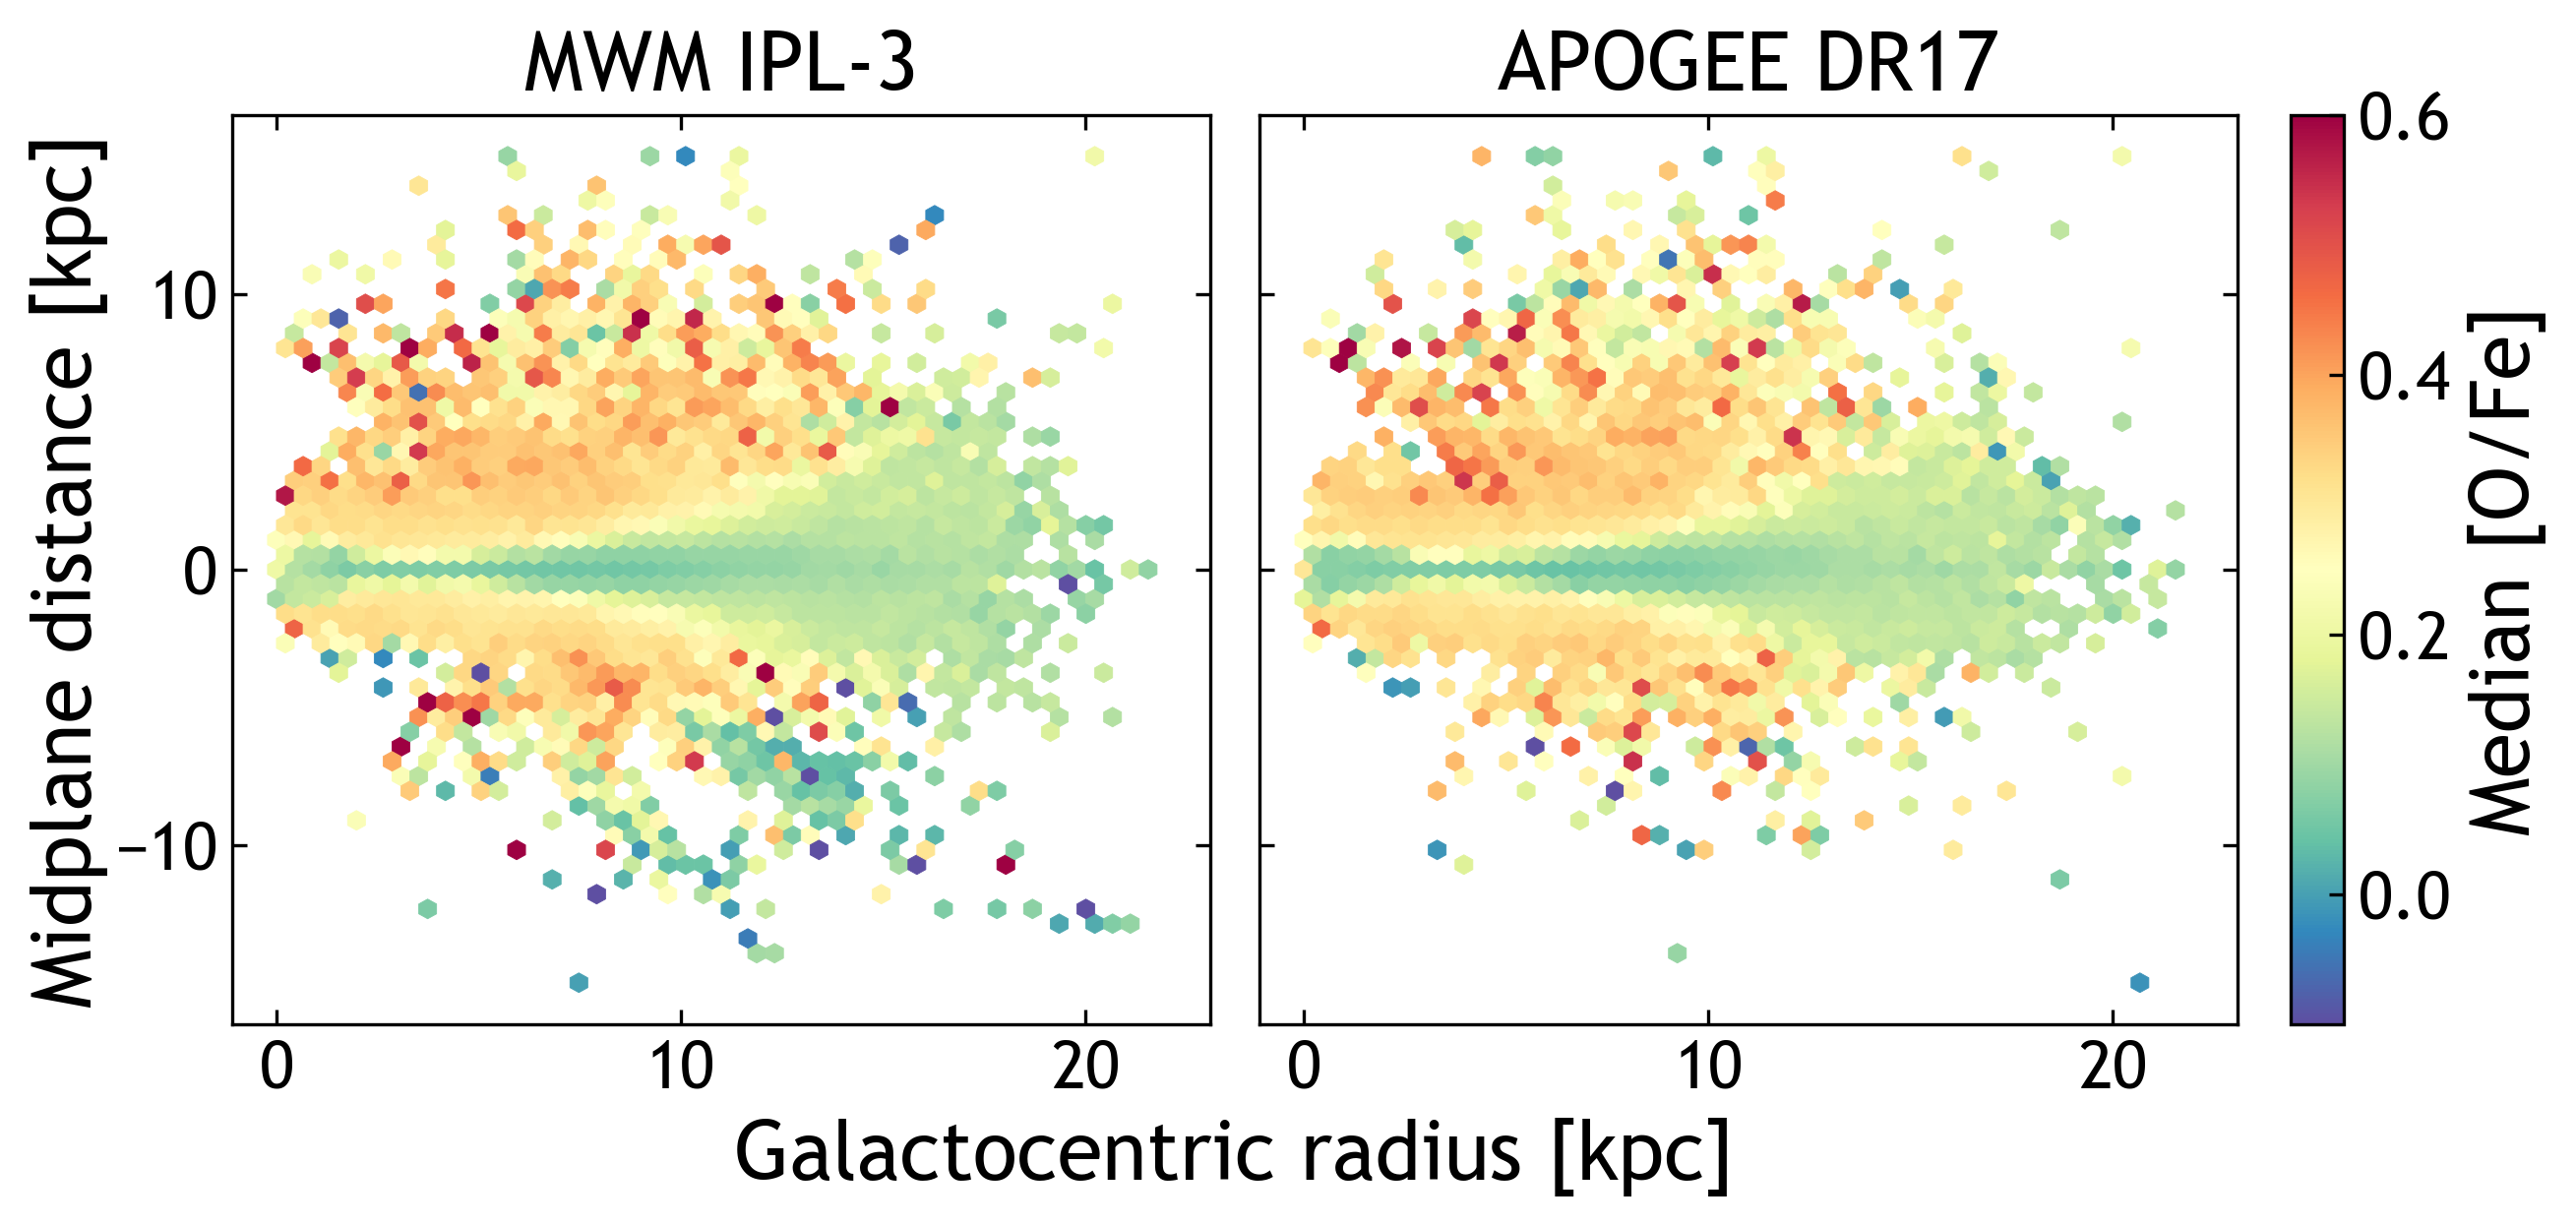

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4), 
                        sharex=True, sharey=True)
xlim = (0, 22)
ylim = (-15, 15)
extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
# MWM
hb0 = axs[0].hexbin(mwm_data['GALR'], mwm_data['GALZ'], 
                    C=mwm_data['O_FE_CORR'], reduce_C_function=np.median,
                    gridsize=50, cmap='Spectral_r', 
                    vmin=-0.1, vmax=0.6,
                    extent=extent, linewidths=0.2)
axs[0].set_title('MWM IPL-3')
# APOGEE
hb1 = axs[1].hexbin(apogee_data['GALR'], apogee_data['GALZ'], 
                    C=apogee_data['O_FE'], reduce_C_function=np.median,
                    gridsize=50, cmap='Spectral_r',
                    vmin=-0.1, vmax=0.6,
                    extent=extent, linewidths=0.2)
axs[1].set_title('APOGEE DR17')
plt.subplots_adjust(right=0.88, wspace=0.05)
cax = plt.axes([0.9, 0.11, 0.02, 0.77])
fig.colorbar(hb1, cax, label='Median [O/Fe]')
# Common axis labels
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Galactocentric radius [kpc]')
plt.ylabel('Midplane distance [kpc]')
plt.show()

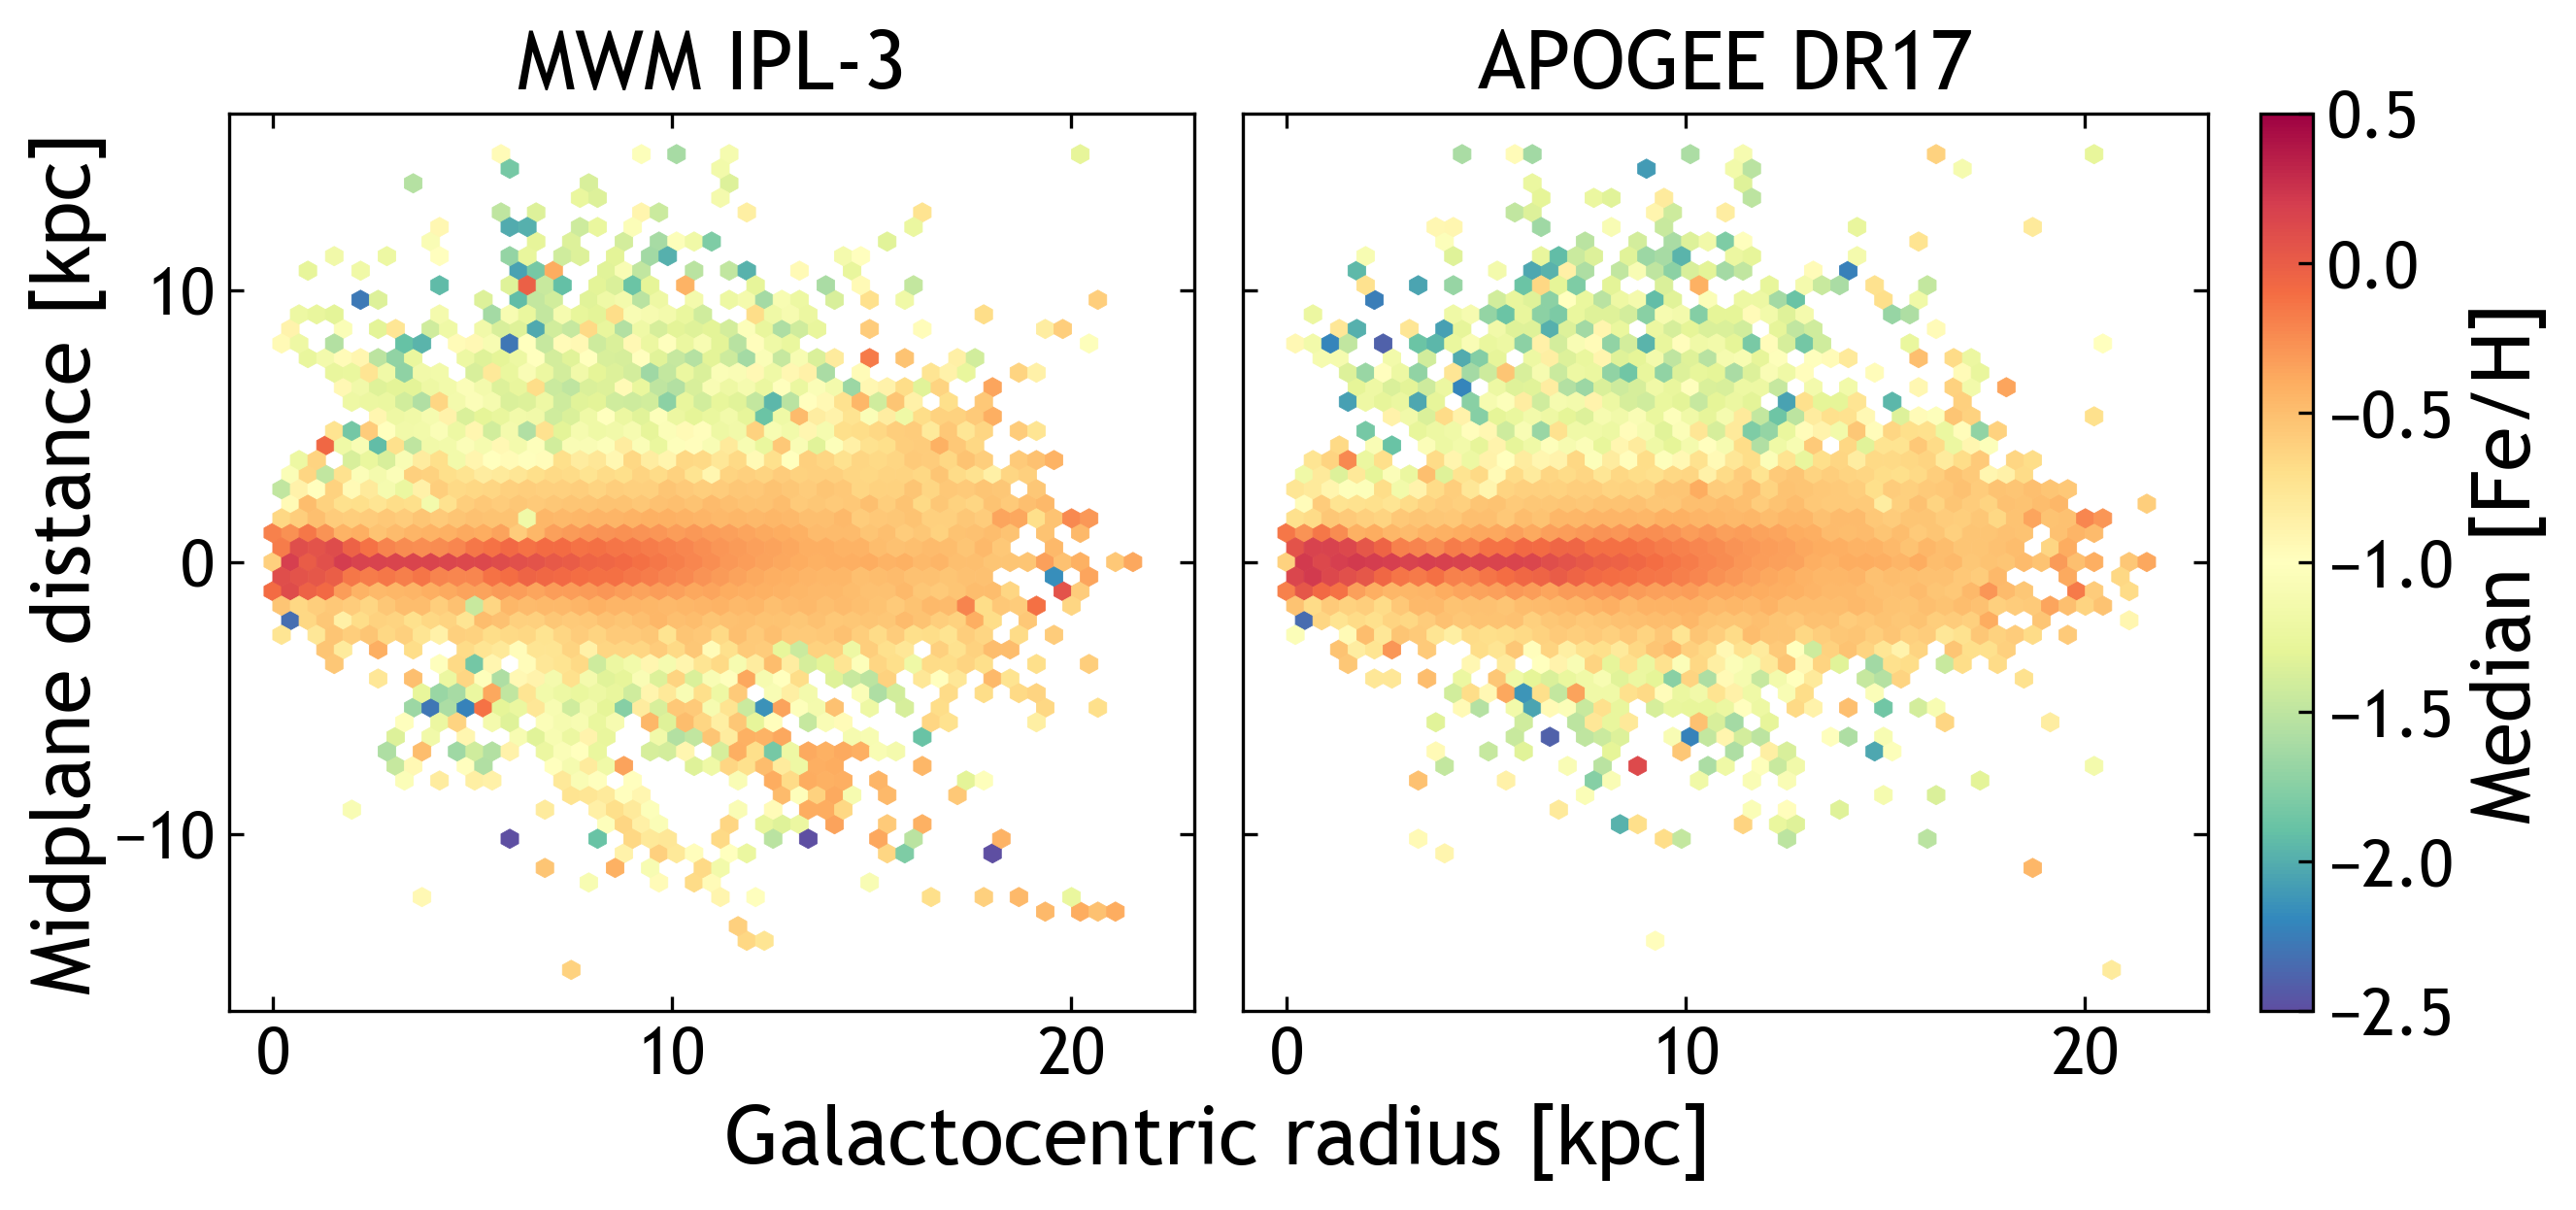

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4), 
                        sharex=True, sharey=True)
xlim = (0, 22)
ylim = (-15, 15)
extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
# MWM
hb0 = axs[0].hexbin(mwm_data['GALR'], mwm_data['GALZ'], 
                    C=mwm_data['FE_H'], reduce_C_function=np.median,
                    gridsize=50, cmap='Spectral_r', 
                    vmin=-2.5, vmax=0.5,
                    extent=extent, linewidths=0.2)
axs[0].set_title('MWM IPL-3')
# APOGEE
hb1 = axs[1].hexbin(apogee_data['GALR'], apogee_data['GALZ'], 
                    C=apogee_data['FE_H'], reduce_C_function=np.median,
                    gridsize=50, cmap='Spectral_r',
                    vmin=-2.5, vmax=0.5,
                    extent=extent, linewidths=0.2)
axs[1].set_title('APOGEE DR17')
plt.subplots_adjust(right=0.88, wspace=0.05)
cax = plt.axes([0.9, 0.11, 0.02, 0.77])
fig.colorbar(hb1, cax, label='Median [Fe/H]')
# Common axis labels
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Galactocentric radius [kpc]')
plt.ylabel('Midplane distance [kpc]')
plt.show()

## Abundance Distribution Functions

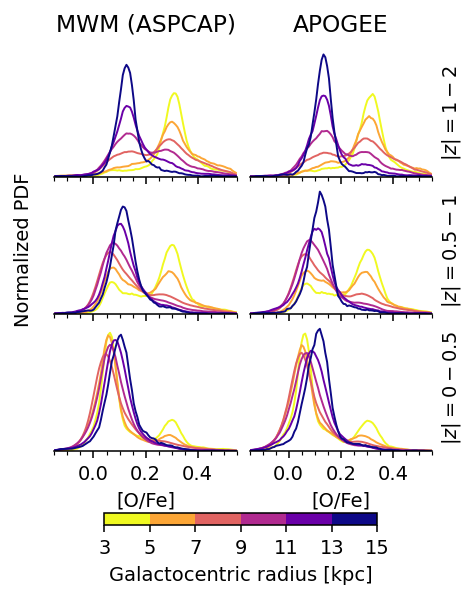

In [12]:
fig, axs = dfs.setup_axes(ncols=2, xlabel='[O/Fe]', figure_width=3.25)
plt.style.use('default')
colors = get_color_list(plt.get_cmap('plasma_r'), _globals.GALR_BINS)
mdf_kwargs = {'bins': 100, 'range': (-0.15, 0.55), 'smoothing': 0.05}
# Plot MWM distributions
dfs.plot_apogee_mdfs(mwm_data, axs[:,0], col='O_FE_CORR', colors=colors, label='MWM (ASPCAP)',
                     **mdf_kwargs)
# Plot APOGEE distributions
dfs.plot_apogee_mdfs(apogee_data, axs[:,1], col='O_FE', colors=colors, 
                     **mdf_kwargs)
axs[0,0].set_xlim(mdf_kwargs['range'])
axs[0,0].xaxis.set_major_locator(MultipleLocator(0.2))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(0.05))
for ax in axs[:,0]:
    ax.set_ylim((0, None))
plt.gcf().set_dpi(140)
plt.show()

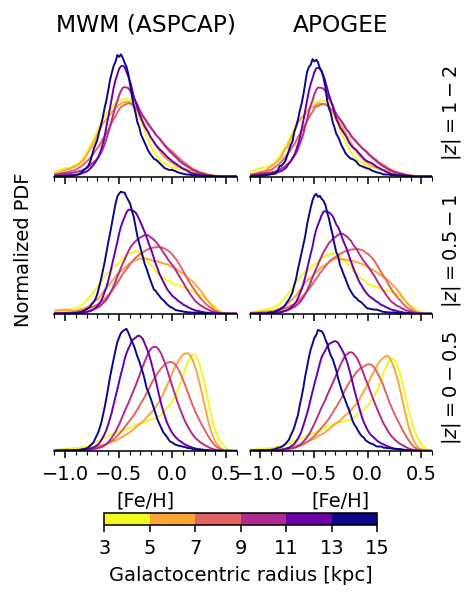

In [13]:
fig, axs = dfs.setup_axes(ncols=2, xlabel='[Fe/H]', figure_width=3.25)
plt.style.use('default')
colors = get_color_list(plt.get_cmap('plasma_r'), _globals.GALR_BINS)
mdf_kwargs = {'bins': 100, 'range': (-1.1, 0.6), 'smoothing': 0.2}
# Plot MWM distributions
dfs.plot_apogee_mdfs(mwm_data, axs[:,0], col='FE_H', colors=colors, label='MWM (ASPCAP)',
                     **mdf_kwargs)
# Plot APOGEE distributions
dfs.plot_apogee_mdfs(apogee_data, axs[:,1], col='FE_H', colors=colors, 
                     **mdf_kwargs)
axs[0,0].set_xlim(mdf_kwargs['range'])
axs[0,0].xaxis.set_major_locator(MultipleLocator(0.5))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(0.1))
for ax in axs[:,0]:
    ax.set_ylim((0, None))
plt.gcf().set_dpi(140)
plt.show()